In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
from tensorflow import keras

In [3]:
(x_train,y_train) ,(x_test,y_test) = keras.datasets.mnist.load_data() #data set mnist that is from keras

In [4]:
x_train.shape , y_train.shape , x_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

In [5]:
 y_test.shape

(10000,)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

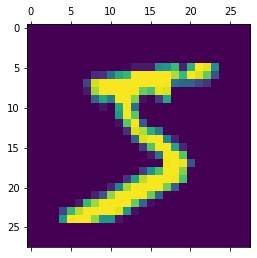

In [7]:
plt.matshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
x_train_flatted= x_train.reshape(len(x_train),28*28)
x_test_flatted= x_test.reshape(len(x_test),28*28)

In [10]:
x_train_flatted.shape , x_test_flatted.shape

((60000, 784), (10000, 784))

In [11]:
x_train_flatted[0].shape

(784,)

In [12]:
from IPython.display import Image
Image(url="https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/0981fe55db7a7abf19ff1d852d9a59153289641e/1_digits_recognition/digits_nn.jpg")

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape=(784,) ,activation = 'sigmoid')
])

model.compile(optimizer = 'adam' , 
             loss = 'sparse_categorical_crossentropy' ,
             metrics = ['accuracy'])
model.fit(x_train_flatted,y_train , epochs=5) 


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 9.3632 - accuracy: 0.8408
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 6.1237 - accuracy: 0.8787
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.6897 - accuracy: 0.8823
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.5297 - accuracy: 0.8867
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.4129 - accuracy: 0.8853


In [14]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [15]:
x_train_sf = x_train_scaled.reshape(len(x_train_scaled),28*28 )
x_test_sf = x_test_scaled.reshape(len(x_test_scaled),28*28 )

In [16]:
model2 = keras.Sequential([
    keras.layers.Dense(10 , input_shape=(784,) , activation = 'sigmoid')
])
model2.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model2.fit(x_train_sf , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4722 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3037 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2830 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9261


In [17]:
model2.evaluate(x_test_sf,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2691 - accuracy: 0.9255


[0.2691172659397125, 0.9254999756813049]

In [18]:
y_predicted = model2.predict(x_test_sf)

313/313 [==============================] - 1s 2ms/step


In [19]:
y_predicted[0]

array([2.5367446e-02, 3.8510382e-07, 6.3472040e-02, 9.6240336e-01,
       2.1766806e-03, 1.4411318e-01, 1.5278488e-06, 9.9985194e-01,
       9.7820804e-02, 7.1544141e-01], dtype=float32)

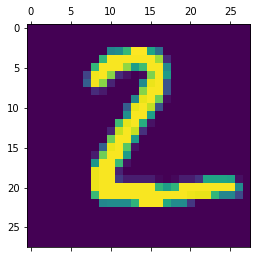

In [20]:
plt.matshow(x_test[1])

In [21]:
np.argmax(y_predicted[1])  # np.argmax finds the max element from the array and returns the index of it

2

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    1,    0,    5,    5,    3,    1,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    9,  923,   14,    7,    7,   12,   10,   39,    5],
       [   4,    0,   21,  907,    0,   34,    2,   11,   22,    9],
       [   1,    1,    5,    2,  897,    0,   13,    4,   10,   49],
       [   8,    2,    3,   19,    6,  805,   13,    4,   26,    6],
       [  14,    3,    6,    1,    7,   16,  907,    2,    2,    0],
       [   2,    6,   21,    7,    6,    1,    0,  946,    4,   35],
       [   7,    7,    7,   13,    9,   41,    8,   10,  860,   12],
       [  11,    7,    1,    8,   16,    9,    0,   17,    4,  936]])>

<AxesSubplot:>

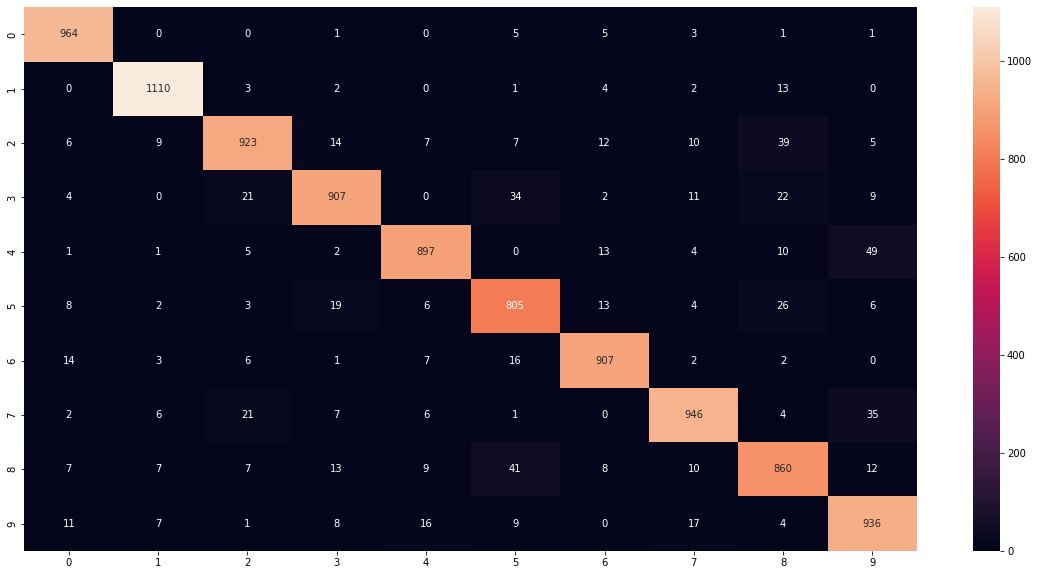

In [24]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(cm , annot=True, fmt='d')

# now by using hidden layer in neuron 

In [25]:
model3 = keras.Sequential([
    keras.layers.Dense(100 , input_shape=(784,) , activation = 'relu'),
    keras.layers.Dense(10 , input_shape=(784,) , activation = 'sigmoid')
])
model3.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model3.fit(x_train_sf , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2741 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1283 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0905 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0681 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0537 - accuracy: 0.9829


In [26]:
model3.evaluate(x_test_sf,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0853 - accuracy: 0.9748


[0.08525127917528152, 0.9747999906539917]

In [27]:
y_predicted3 =model3.predict(x_test_sf)

313/313 [==============================] - 1s 3ms/step


In [28]:
y_predict = [np.argmax(i) for i in y_predicted3]
y_predict[:5]

[7, 2, 1, 0, 4]

In [29]:
cm3 = tf.math.confusion_matrix(labels=y_test, predictions=y_predict)

In [30]:
cm3

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    1,    0,    1,    2,    1,    1,    0],
       [   0, 1126,    4,    0,    0,    1,    3,    0,    1,    0],
       [   5,    2, 1000,    2,    3,    0,    4,    7,    7,    2],
       [   1,    0,    1,  975,    0,   10,    1,    5,    3,   14],
       [   2,    0,    1,    0,  953,    0,    9,    2,    1,   14],
       [   3,    0,    0,    3,    1,  878,    3,    0,    2,    2],
       [   9,    3,    2,    1,    2,    2,  938,    0,    1,    0],
       [   2,    4,   10,    2,    0,    0,    0, 1002,    1,    7],
       [   9,    1,    1,   11,    5,    9,    7,    4,  912,   15],
       [   3,    2,    0,    2,    5,    3,    0,    4,    0,  990]])>

<AxesSubplot:>

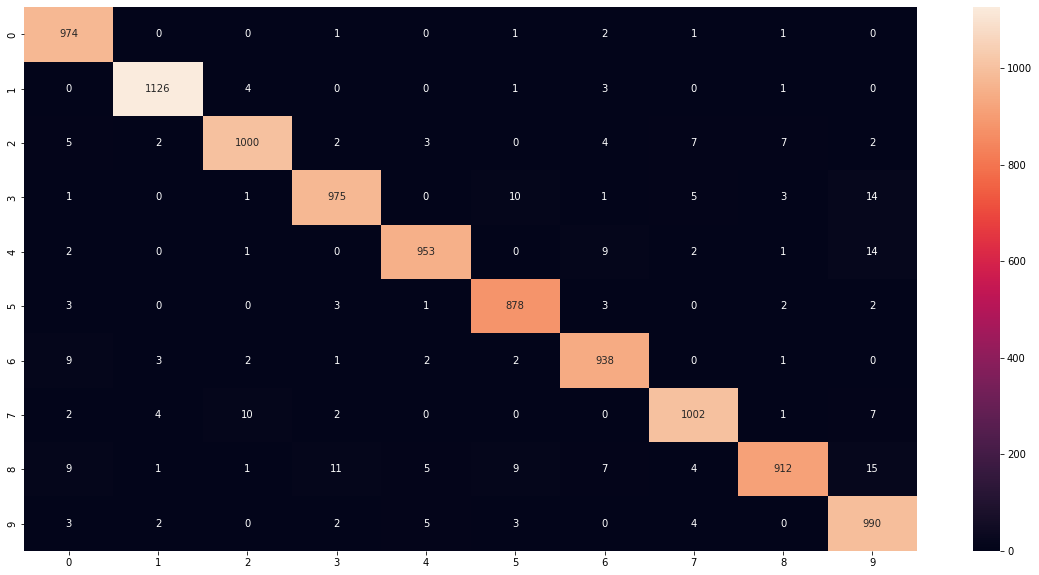

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(cm3 , annot=True, fmt='d')

# using flatten layer so that we dont have to call .reshape on input data

In [ ]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100 , input_shape=(784,) , activation = 'relu'),
    keras.layers.Dense(10 , input_shape=(784,) , activation = 'sigmoid')
])
model4.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model4.fit(x_train_scaled , y_train , epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2739 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1240 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0874 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0671 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0518 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0427 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0348 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0290 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0241 - accuracy: 0.9928
Epoch 10/10
 855/1875 [============>.................] - ETA: 3s - loss: 0.0185 - 

In [ ]:
model4.evaluate(x_test_scaled , y_test)

In [ ]:
def sigmoid(x):
    import math
    return 1/(1+(math.exp(-x)))
sigmoid(18) 